In [152]:
class Node():
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class BinarySearchTree():
    def __init__(self):
        self.root = None
        self.count = 0
        
    def tree_print(self):
        self.__tree_print(self.root)

    def tree_walk_horisontal(self):
        if self.root is not None:
            self.__tree_walk_hor([self.root])
        
    def __tree_walk_hor(self, nodes: list):
        new_list = []
        if len(nodes) == 0:
            return
        for obj in nodes:
            print(obj.data, end = " ")
            if obj.left is not None:
                new_list.append(obj.left)
            if obj.right is not None:
                new_list.append(obj.right)
        print()
        self.__tree_walk_hor(new_list)
        
    def __tree_print(self, node):
        if node is not None:
            print(node.data)
            print("left", node.left.data if (node.left is not None) else None)
            print("right", node.right.data if (node.right is not None) else None)
            print('-' * 100)
            self.__tree_print(node.left)
            self.__tree_print(node.right)

    def __height(self, node):
        self.count += 1
        if node is None:
            return 0
        return max(self.__height(node.left), self.__height(node.right)) + 1
    
    def height(self):
        if self.root is None:
            return 0
        return self.__height(self.root)

    def bfs(self):
        for i in range(self.height()):
            self.level_print(self.root, i)
            print()
            
    def level_print(self, node, level):
        if node is None:
            return
        if level == 0:
            print(node.data, end=' ')
        self.level_print(node.left, level - 1)
        self.level_print(node.right, level - 1)

    def __delete(self, node, elem):
        if node is not None:
            if node.left is not None:
                if elem == node.left.data:
                    hll = self.__height(node.left.left)
                    hlr = self.__height(node.left.right)
                    if hll > hlr:
                        node.left = self.smallRotation(node.left, 1)
                        tmp = node.left.right
                        node.left.right = node.left.right.right
                        node.left.right.left = tmp
                            
                    else:
                        node.right = self.smallRotation(node.right, -1)
                        tmp = node.right.left
                        node.right.left = node.right.left.left
                        node.right.left.right = tmp
            
            if node.right is not None:
                if elem == node.right.data:
                    nodeSave = None
                    if node.right.left is not None:
                        if node.right.left.right is not None:
                            nodeSave = node.right.left.right
                        oldRight = node.right.right
                        node.right = node.right.left
                        node.right.right = oldRight
                        
                    
            self.__delete(node.left, elem)
            self.__delete(node.right, elem)

    
    def delete(self, elem):
        if self.root is None:
            return
        self.__delete(self.root, elem)

    def smallRotate(self, node, rotDir):
        self.count += 1
        if rotDir == 1: #rotation to the right
            p = node
            q = node.left
            b = q.right
            node = q
            node.right = p
            p.left = b
        if rotDir == -1: #rotation to the left
            q = node
            p = node.right
            b = p.left
            node = p
            node.left = q
            q.right = b
        return node

    
    def __balance(self, node):
        self.count += 1
        if node is not None:
            node.left = self.__balance(node.left)
            hl = self.__height(node.left)
            hr = self.__height(node.right)
            if (hl-hr) > 1:
                hll = self.__height(node.left.left)
                hlr = self.__height(node.left.right)
                if hll < hlr:
                    node.left = self.smallRotate(node.left, -1)
                node = self.smallRotate(node, 1)
            
            node.right = self.__balance(node.right)
            hl = self.__height(node.left)
            hr = self.__height(node.right)
            if (hr - hl) > 1:
                hrl = self.__height(node.right.left)
                hrr = self.__height(node.right.right)
                if hrl > hrr:
                    node.right = self.smallRotate(node.right, 1)
                node = self.smallRotate(node, -1)
        return node
                
    def balance(self):
        self.count = 0
        if self.root is not None:
            self.root = self.__balance(self.root)
        return self.count
        
    def add(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            node = self.root
            while node is not None:
                if data < node.data:
                    if node.left is None:
                        node.left = Node(data)
                        break
                    else:
                        node = node.left
                elif data > node.data:
                    if node.right is None:
                        node.right = Node(data)
                        break
                    else:
                        node = node.right
                else:
                    break
    # метод который разворачивает дерево, проходя по каждому узлу сложность O(N), 
    # при этом используется N уровней дерева в рекурсии O(N)
    def invert_tree(self):
        self.root = self.__invert_tree(self.root)
    
    def __invert_tree(self, node):
        if node is None:
            return None
        # Меняем местами левого и правого потомков
        node.left, node.right = node.right, node.left
        # Рекурсивно инвертируем левого и правого потомков
        self.__invert_tree(node.left)
        self.__invert_tree(node.right)
        return node
    
    def pretty_print(self):
        levels = []
        self.__get_tree_levels(self.root, 0, levels)
        
        # Отступ для каждого уровня
        for i, level in enumerate(levels):
            line = ''
            connections = ''
            spacing = ' ' * (2 ** (len(levels) - i - 1))  # динамический отступ для каждого уровня
            for j, node in enumerate(level):
                if node:
                    line += f'{node.data}'
                else:
                    line += ' '  # Печатаем пробел для пустых узлов

                if node:
                    # Добавляем соединительные линии для правого и левого дочернего узла
                    if node.left or node.right:
                        if node.left:
                            connections += '/' + ' ' * (len(str(node.data)) - 1)

                        if node.right:
                            connections += '\\' + ' ' * (len(str(node.data)) - 1)
                    
                        connections += ' ' * (2 ** (len(levels) - i - 1))  # для пустых узлов добавляем одинаковые пробелы

                if j < len(level) - 1:
                    line += ' ' * (2 ** (len(levels) - i - 1))  # Пробел между узлами на одном уровне

            # Печатаем уровень и соединительные линии
            print(spacing + line)
            if i < len(levels) - 1:
                print(spacing + connections)

    def __get_tree_levels(self, node, depth, levels):
        if len(levels) <= depth:
            levels.append([])
        if node is None:
            levels[depth].append(None)
        else:
            levels[depth].append(node)
            self.__get_tree_levels(node.left, depth + 1, levels)
            self.__get_tree_levels(node.right, depth + 1, levels)

In [157]:
tree = BinarySearchTree()
tree.tree_print()


In [161]:
tree.add(6)
tree.tree_print()

7
left 3
right 24
----------------------------------------------------------------------------------------------------
3
left 1
right 5
----------------------------------------------------------------------------------------------------
1
left -1
right 2
----------------------------------------------------------------------------------------------------
-1
left None
right None
----------------------------------------------------------------------------------------------------
2
left None
right None
----------------------------------------------------------------------------------------------------
5
left 4
right 6
----------------------------------------------------------------------------------------------------
4
left None
right None
----------------------------------------------------------------------------------------------------
6
left None
right None
----------------------------------------------------------------------------------------------------
24
left None
right 58
-------

In [162]:
import random
tree.add(3)
tree.add(1)
tree.add(2)
tree.add(5)
tree.add(4)
tree.add(7)
tree.add(-1)
tree.add(24)
tree.add(58)
tree.add(44)

#for i in range(13):
#    tree.add(random.randint(0,100))
tree.tree_print()

7
left 3
right 24
----------------------------------------------------------------------------------------------------
3
left 1
right 5
----------------------------------------------------------------------------------------------------
1
left -1
right 2
----------------------------------------------------------------------------------------------------
-1
left None
right None
----------------------------------------------------------------------------------------------------
2
left None
right None
----------------------------------------------------------------------------------------------------
5
left 4
right 6
----------------------------------------------------------------------------------------------------
4
left None
right None
----------------------------------------------------------------------------------------------------
6
left None
right None
----------------------------------------------------------------------------------------------------
24
left None
right 58
-------

In [164]:
tree.pretty_print()

                7hfbvn
                /\                
        3        24hfbvn
        /\        \         
    1    5         58hfbvn
    /\    /\    /     
  -1  2  4  6  44   hfbvn
  
                    hfbvn


In [90]:
tree.invert_tree()
tree.pretty_print()

                6
                /\
        24        3
        /  /\
    58         5    1
     \     \/\
     44     4  2  -1
      
                


In [13]:
import time

start = time.time()
tree.tree_walk_horisontal()
print(time.time()-start)

6 
2 20 
5 8 60 
7 27 96 
23 53 72 
52 54 
55 
56 
0.0003414154052734375


In [117]:
tree.height()

6

In [118]:
start = time.time()
tree.bfs()
print(time.time()-start)

6 
20 
8 60 
7 27 96 
23 53 
52 
0.00035500526428222656


In [119]:
tree.delete(20)

In [120]:
tree.tree_walk_horisontal()

6 
8 
7 60 
27 96 
23 53 
52 


In [74]:
tree = BinarySearchTree()
tree.add(10)
tree.add(8)
tree.add(9)
tree.add(7)
tree.add(11)
tree.add(5)
tree.tree_print()

10
left 8
right 11
----------------------------------------------------------------------------------------------------
8
left 7
right 9
----------------------------------------------------------------------------------------------------
7
left 5
right None
----------------------------------------------------------------------------------------------------
5
left None
right None
----------------------------------------------------------------------------------------------------
9
left None
right None
----------------------------------------------------------------------------------------------------
11
left None
right None
----------------------------------------------------------------------------------------------------


In [75]:
tree.delete(7)

AttributeError: 'BinarySearchTree' object has no attribute 'smallRotation'

In [27]:
tree.root = tree.smallRotate(tree.root, 1)

In [28]:
tree.tree_print()

8
left 7
right 10
----------------------------------------------------------------------------------------------------
7
left None
right None
----------------------------------------------------------------------------------------------------
10
left 9
right 11
----------------------------------------------------------------------------------------------------
9
left None
right None
----------------------------------------------------------------------------------------------------
11
left None
right None
----------------------------------------------------------------------------------------------------


In [30]:
tree.root = tree.smallRotate(tree.root, -1)
tree.tree_print()

10
left 8
right 11
----------------------------------------------------------------------------------------------------
8
left 7
right 9
----------------------------------------------------------------------------------------------------
7
left None
right None
----------------------------------------------------------------------------------------------------
9
left None
right None
----------------------------------------------------------------------------------------------------
11
left None
right None
----------------------------------------------------------------------------------------------------


In [66]:
tree.balance()

370

In [59]:
tree.tree_print()

53
left 6
right 60
----------------------------------------------------------------------------------------------------
6
left 2
right 20
----------------------------------------------------------------------------------------------------
2
left None
right 5
----------------------------------------------------------------------------------------------------
5
left None
right None
----------------------------------------------------------------------------------------------------
20
left 8
right 27
----------------------------------------------------------------------------------------------------
8
left 7
right None
----------------------------------------------------------------------------------------------------
7
left None
right None
----------------------------------------------------------------------------------------------------
27
left 23
right 52
----------------------------------------------------------------------------------------------------
23
left None
right None
------

In [60]:
tree = BinarySearchTree()
tree.add(5)
tree.add(4)
tree.add(3)
tree.add(2)
tree.add(6)
tree.add(7)
tree.add(8)
tree.add(9)
tree.tree_print()

5
left 4
right 6
----------------------------------------------------------------------------------------------------
4
left 3
right None
----------------------------------------------------------------------------------------------------
3
left 2
right None
----------------------------------------------------------------------------------------------------
2
left None
right None
----------------------------------------------------------------------------------------------------
6
left None
right 7
----------------------------------------------------------------------------------------------------
7
left None
right 8
----------------------------------------------------------------------------------------------------
8
left None
right 9
----------------------------------------------------------------------------------------------------
9
left None
right None
----------------------------------------------------------------------------------------------------


In [61]:
tree.balance()
tree.tree_print()

5
left 3
right 8
----------------------------------------------------------------------------------------------------
3
left 2
right 4
----------------------------------------------------------------------------------------------------
2
left None
right None
----------------------------------------------------------------------------------------------------
4
left None
right None
----------------------------------------------------------------------------------------------------
8
left 6
right 9
----------------------------------------------------------------------------------------------------
6
left None
right 7
----------------------------------------------------------------------------------------------------
7
left None
right None
----------------------------------------------------------------------------------------------------
9
left None
right None
----------------------------------------------------------------------------------------------------


In [68]:
sizes = [10, 100, 300, 700, 1000]
cs = []
for size in sizes:
    tree = BinarySearchTree()
    for _ in range(size):
        tree.add(random.randint(0, size*100))
    cs.append(tree.balance())

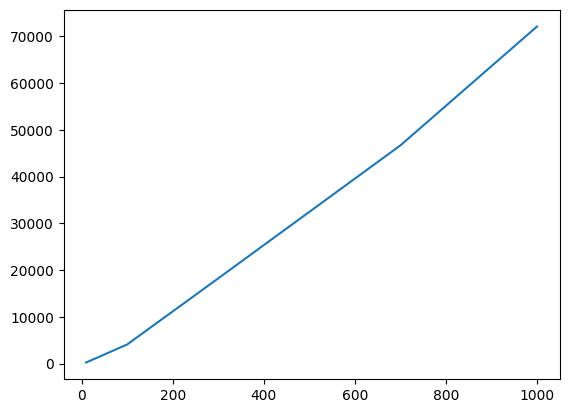

In [69]:
from matplotlib import pyplot as plt

plt.plot(sizes, cs)